<a href="https://colab.research.google.com/github/PratibhaPachare/task-7q/blob/main/TASK7_Assignment11(DataPreprocessing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 11

**Step 1: Importing the libraries**

In [ ]:
# Importing the necessary modules.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

**Step 2: Importing dataset**

In [ ]:
# Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/CSV FILES/TASK7/Data.csv")
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [ ]:
# Configuration of the DataFrame.
df.shape

(10, 4)

**Step 3: Handling the missing data**

In [ ]:
# Checking for missing values.
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

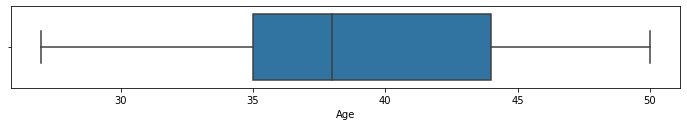

In [ ]:
# Boxplot for 'Age' column
plt.figure(figsize=(12,1.5))
sns.boxplot(df.Age)
plt.show()

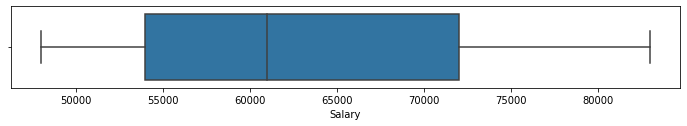

In [ ]:
# Boxplot for 'Salary' column
plt.figure(figsize=(12,1.5))
sns.boxplot(df.Salary)
plt.show()

In [ ]:
# Treating the missing values.
df.fillna(
    {"Age":df['Age'].mean(),
     "Salary":df['Salary'].mean()}, 
     inplace=True)

In [ ]:
# Checking for missing values.
df.isnull().sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

**Step 4: Encoding categorical data**

In [ ]:
# Encoding categorical data in 'Purchased' column.
df.Purchased = df.Purchased.map({"Yes":1, "No":0})
df.Purchased.value_counts()

0    5
1    5
Name: Purchased, dtype: int64

**Step 5: Creating a dummy variable**

In [ ]:
# create dummy variables
df_country = pd.get_dummies(df.Country)
df = pd.concat([df, df_country],axis=1)
df

,Country,Age,Salary,Purchased,France,Germany,Spain
0,France,44.000000,72000.000000,0,1,0,0
1,Spain,27.000000,48000.000000,1,0,0,1
2,Germany,30.000000,54000.000000,0,0,1,0
3,Spain,38.000000,61000.000000,0,0,0,1
4,Germany,40.000000,63777.777778,1,0,1,0
5,France,35.000000,58000.000000,1,1,0,0
6,Spain,38.777778,52000.000000,0,0,0,1
7,France,48.000000,79000.000000,1,1,0,0
8,Germany,50.000000,83000.000000,0,0,1,0
9,France,37.000000,67000.000000,1,1,0,0


In [ ]:
df.drop('Country', axis=1, inplace = True)
df

,Age,Salary,Purchased,France,Germany,Spain
0,44.000000,72000.000000,0,1,0,0
1,27.000000,48000.000000,1,0,0,1
2,30.000000,54000.000000,0,0,1,0
3,38.000000,61000.000000,0,0,0,1
4,40.000000,63777.777778,1,0,1,0
5,35.000000,58000.000000,1,1,0,0
6,38.777778,52000.000000,0,0,0,1
7,48.000000,79000.000000,1,1,0,0
8,50.000000,83000.000000,0,0,1,0
9,37.000000,67000.000000,1,1,0,0


**Step 6: Splitting the datasets into training sets and Test sets**

In [ ]:
# Splitting the dataset into training Dataset and Test Dataset.
# Displaying the rows of train_df.
train_df, test_df = train_test_split(df, test_size = 0.33, random_state = 42)
train_df.index = [i for i in range(len(train_df))]
test_df.index = [i for i in range(len(test_df))]
train_df

,Age,Salary,Purchased,France,Germany,Spain
0,48.000000,79000.000000,1,1,0,0
1,30.000000,54000.000000,0,0,1,0
2,37.000000,67000.000000,1,1,0,0
3,40.000000,63777.777778,1,0,1,0
4,38.000000,61000.000000,0,0,0,1
5,38.777778,52000.000000,0,0,0,1


In [ ]:
# Displaying the rows of test_df.
test_df

,Age,Salary,Purchased,France,Germany,Spain
0,50.0,83000.0,0,0,1,0
1,27.0,48000.0,1,0,0,1
2,35.0,58000.0,1,1,0,0
3,44.0,72000.0,0,1,0,0


**Step 7: Feature Scaling**

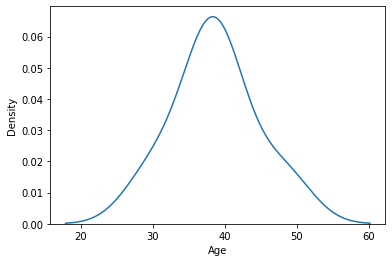

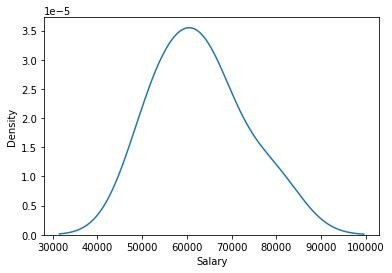

In [ ]:
# Checking if the Age and Salary is Normally distributed.
sns.distplot(train_df.Age, hist=False, bins="sturges")
plt.show()
sns.distplot(train_df.Salary, hist=False, bins="sturges")
plt.show()

The Age and Salary is Normally distributed, so we will do Standardization.

In [ ]:
# Standardising features of training Dataframe 
features_scale_train = train_df[['Age','Salary']]
scaler = StandardScaler(copy=False)
scaler.fit(features_scale_train)
train_stand = scaler.transform(features_scale_train)
train_stand_df = pd.DataFrame(train_stand, columns=['Age', 'Salary'])
train_df = pd.concat([train_stand_df,train_df.iloc[:,2:]], axis=1)
train_df

,Age,Salary,Purchased,France,Germany,Spain
0,1.774925,1.814740,1,1,0,0
1,-1.634615,-0.985144,0,0,1,0
2,-0.308683,0.470795,1,1,0,0
3,0.259574,0.109921,1,0,1,0
4,-0.119264,-0.201177,0,0,0,1
5,0.028062,-1.209135,0,0,0,1


In [ ]:
# Standardising features of testing Dataframe 
features_scale_test = test_df[['Age','Salary']]
test_stand = scaler.transform(features_scale_test)
test_stand_df = pd.DataFrame(test_stand, columns=['Age', 'Salary'])
test_df = pd.concat([train_stand_df,train_df.iloc[:,2:]], axis=1)
test_df

,Age,Salary,Purchased,France,Germany,Spain
0,1.774925,1.814740,1,1,0,0
1,-1.634615,-0.985144,0,0,1,0
2,-0.308683,0.470795,1,1,0,0
3,0.259574,0.109921,1,0,1,0
4,-0.119264,-0.201177,0,0,0,1
5,0.028062,-1.209135,0,0,0,1
